# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Reading and Understanding Data

In [3]:
df=pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df1=df.copy()
df1.shape

(730, 16)

In [9]:
df1.drop_duplicates(inplace=True)

In [10]:
df1.shape

(730, 16)

There are no duplicates

In [11]:
#removing the unwanted columns
df=df.drop("instant",axis=1)

In [12]:
df=df.drop("dteday",axis=1)

In [13]:
df=df.drop("casual",axis=1)

In [14]:
df=df.drop("registered",axis=1)

In [15]:
df.shape

(730, 12)

In [16]:
#converting numerical-categorical to categorical in order to avoid name confusions in the model
df["season"]=df["season"].map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df["month"]=df["mnth"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
df["weekday"]=df["weekday"].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"})
df["weathersit"]=df["weathersit"].map({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"})

In [17]:
#renamed mnth column to month above,so as it creates two new columns, wea dropped mnth column
df=df.drop("mnth",axis=1)

In [18]:
df.dtypes

season         object
yr              int64
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
month          object
dtype: object

In [19]:
#seggregating dtypes
obj_cols=[]
int_cols=[]
float_cols=[]

for i,j in df.dtypes.to_dict().items():
    if j=="object":
        obj_cols.append(i)
    elif j=="int64":
        int_cols.append(i)
    else:
        float_cols.append(i)
print(obj_cols)
print(int_cols)
print(float_cols)


['season', 'weekday', 'weathersit', 'month']
['yr', 'holiday', 'workingday', 'cnt']
['temp', 'atemp', 'hum', 'windspeed']


In [20]:
#now seggregating categorical columns and numerical columns
objects=int_cols+obj_cols
objects.remove("cnt")
numericals=float_cols+["cnt"]

# Visualising the data

# Bivariate Analysis

Since Linear Regression is between 2 variables and more, it doesn't require univariate analysis

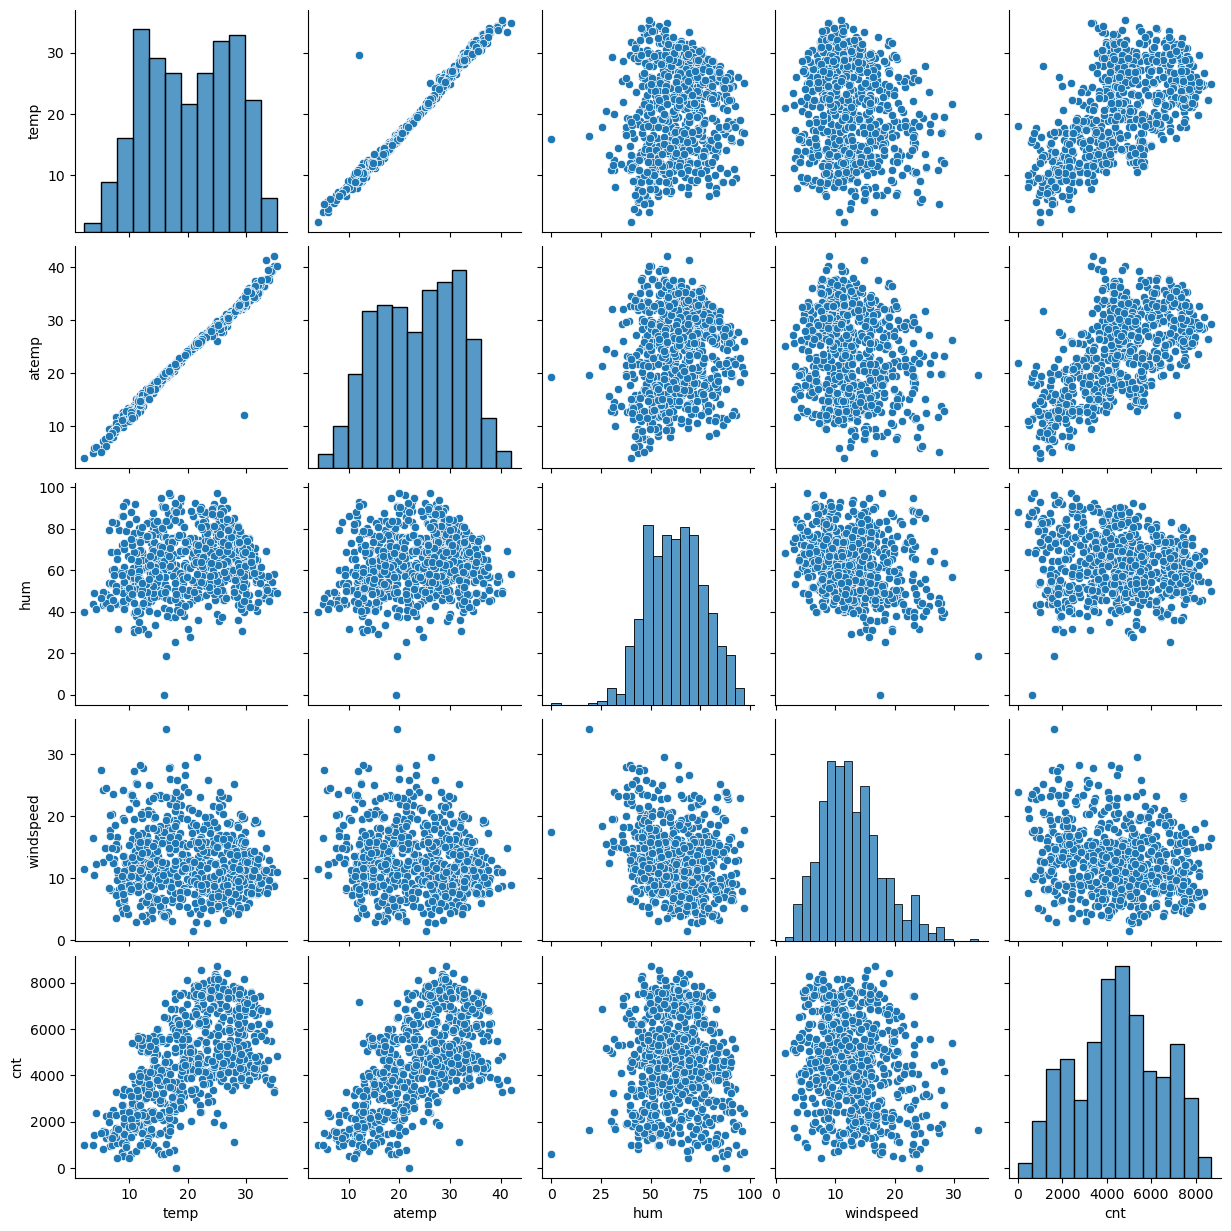

In [21]:
sns.pairplot(df[numericals])
plt.show()

From the above plots, we can see that, there is no much dependecy between variables except for the "temp" and "atemp" variables

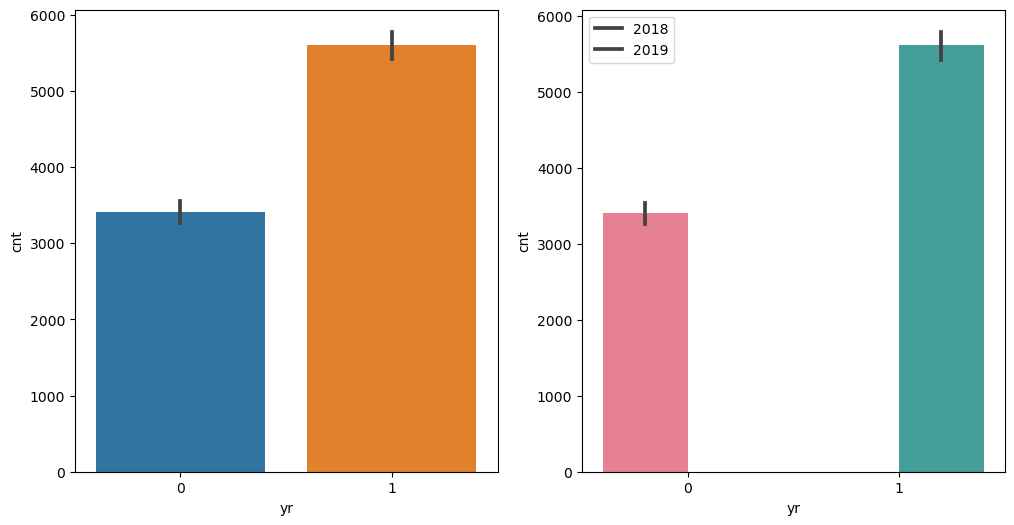

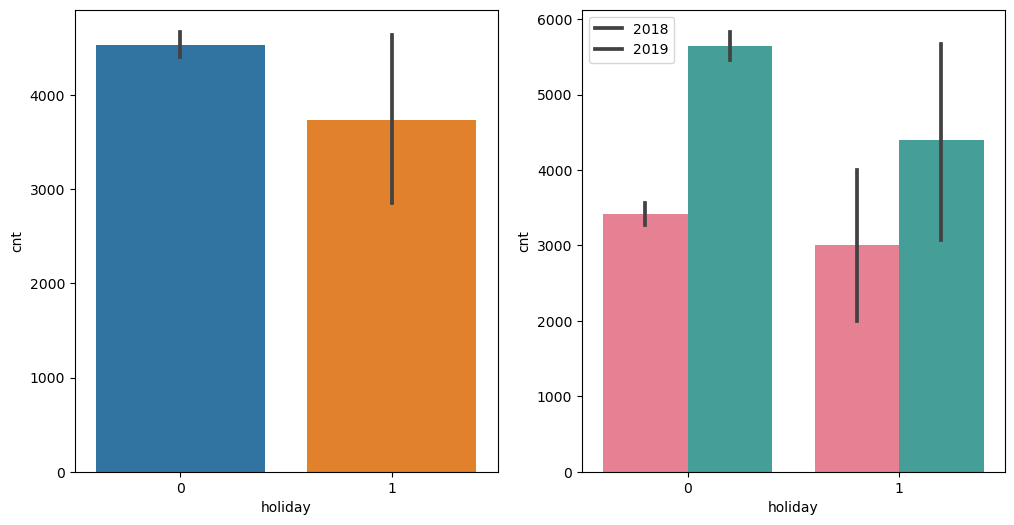

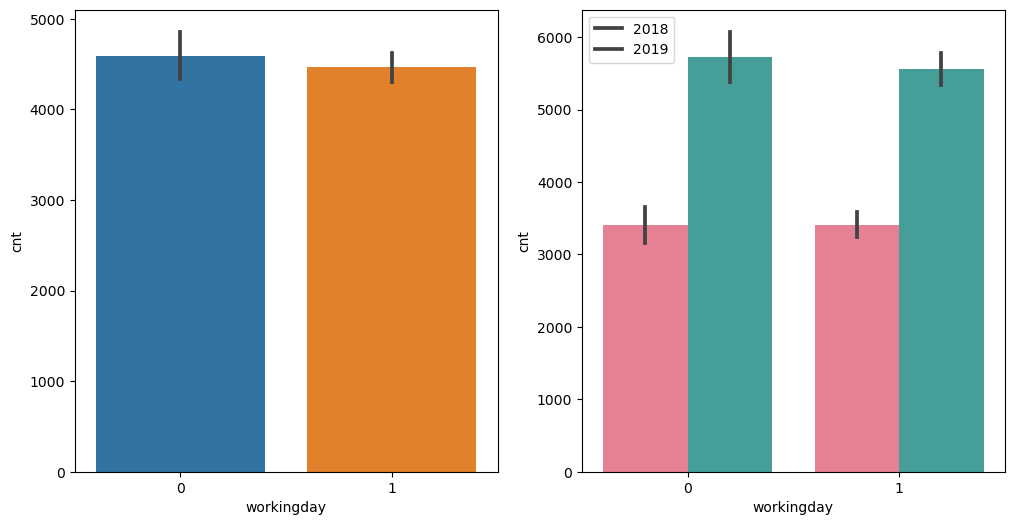

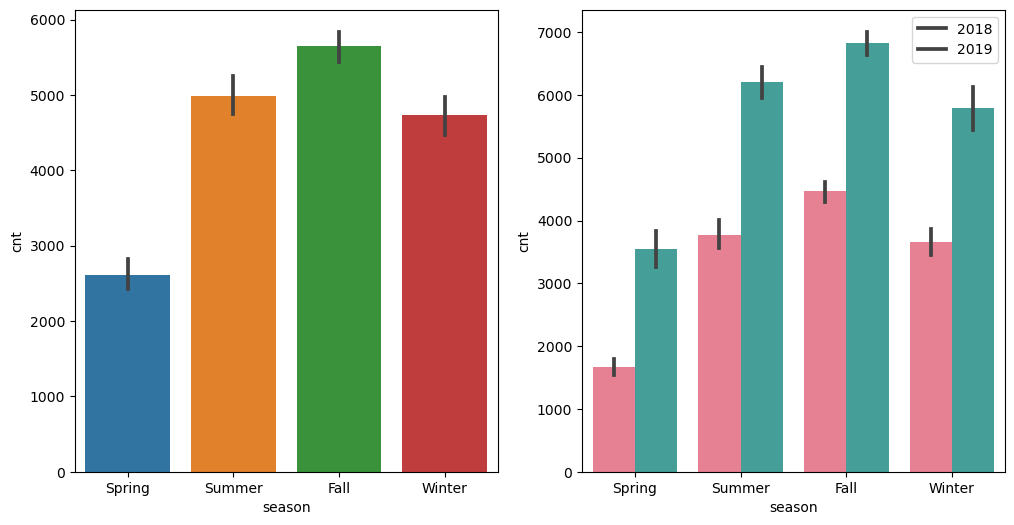

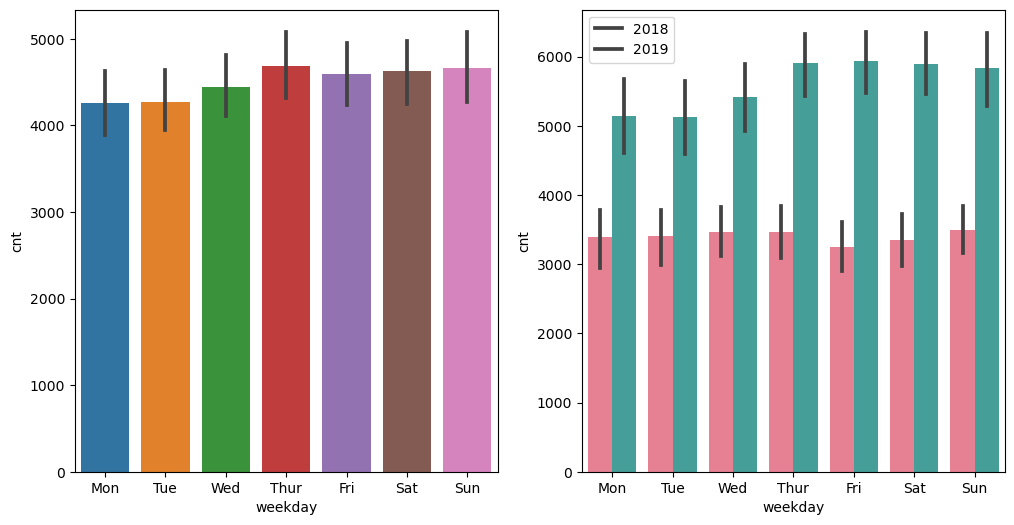

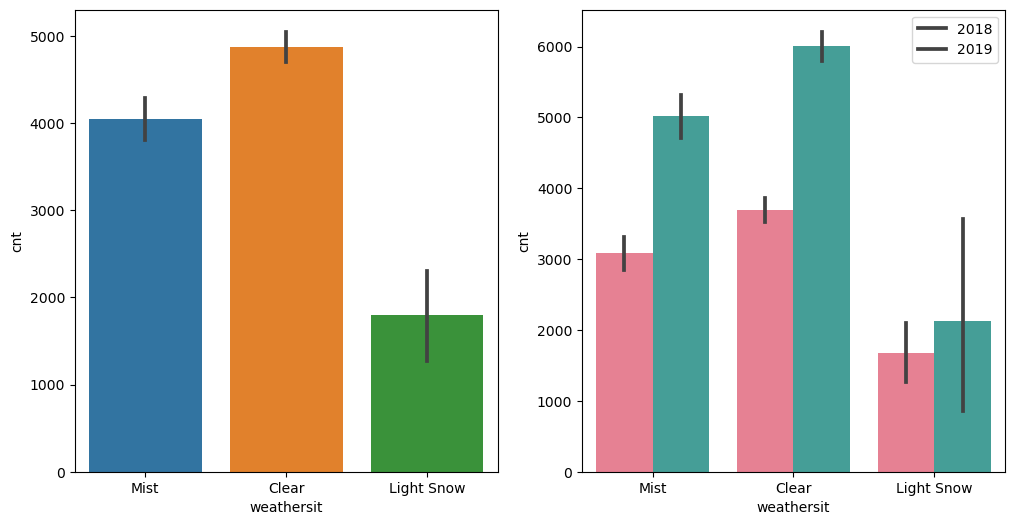

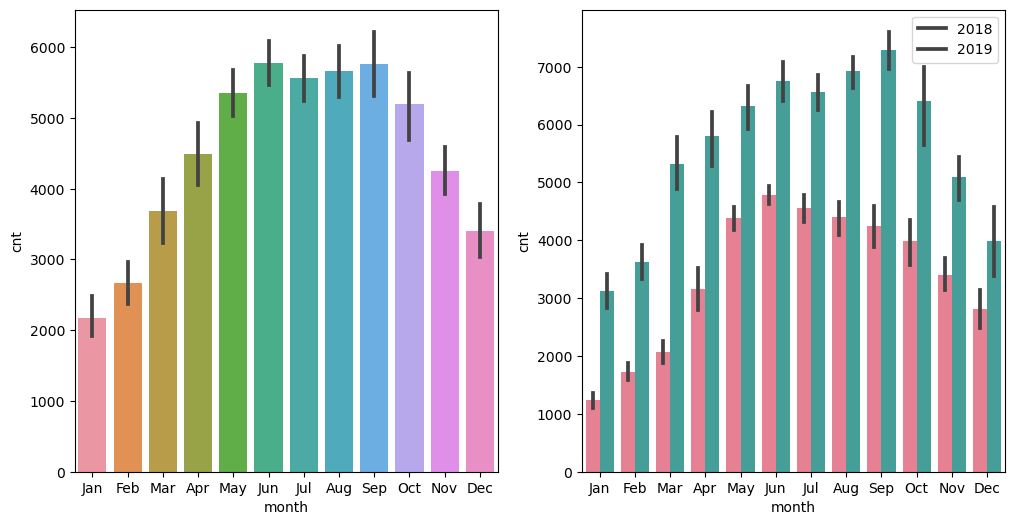

In [22]:
#categorical vs categorical analysis w.r.t count
for i in objects:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=i,y="cnt",data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=i,y="cnt",data=df,hue="yr",palette="husl")
    plt.legend(labels=["2018","2019"])
    plt.show()


From the above analysis, we can clearly illustrate that in each and every category, the bike rentals is significantly more in the year 2019.

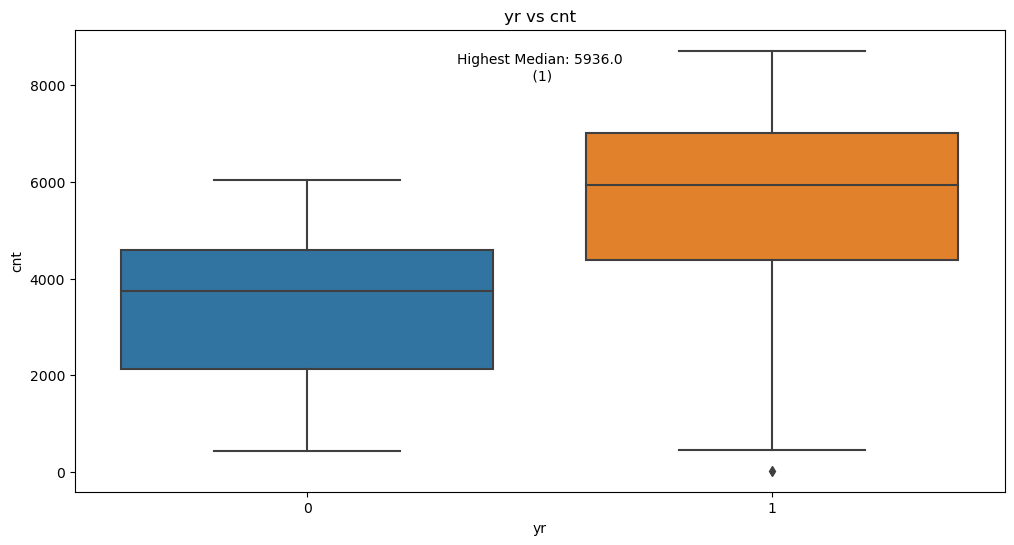

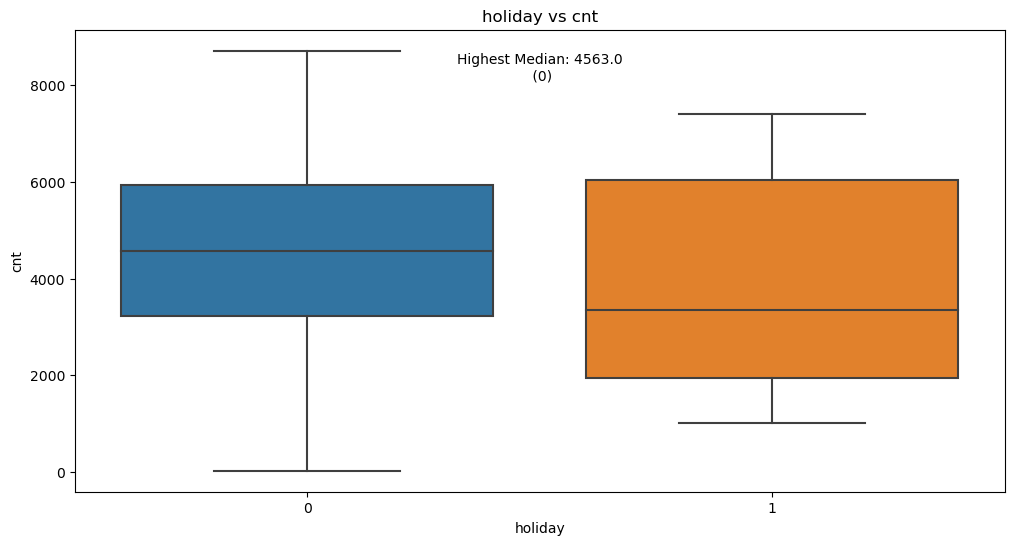

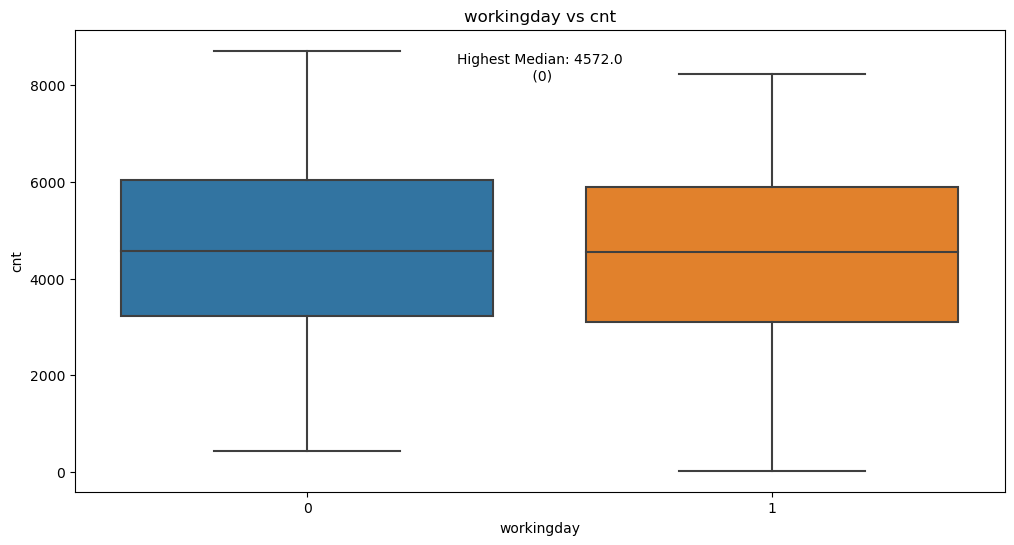

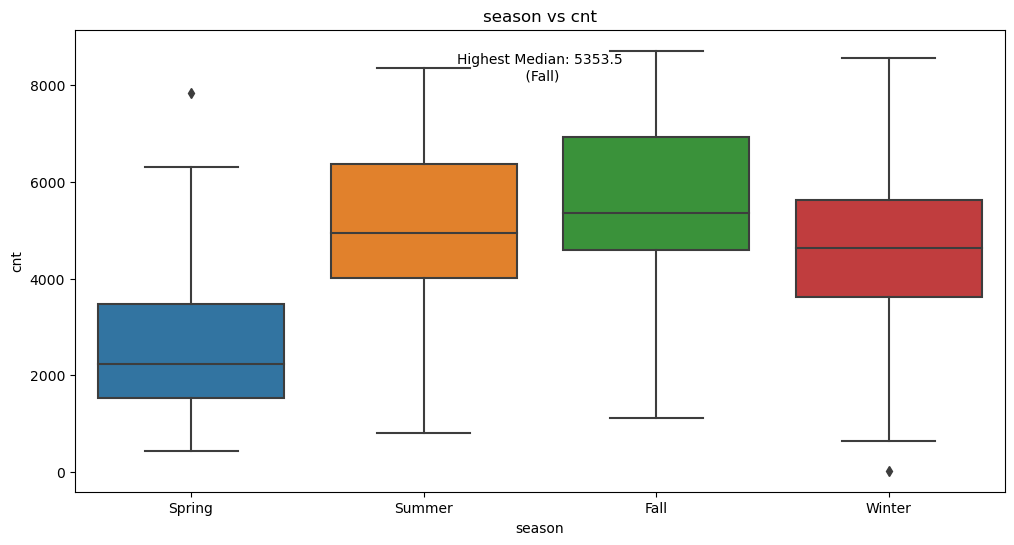

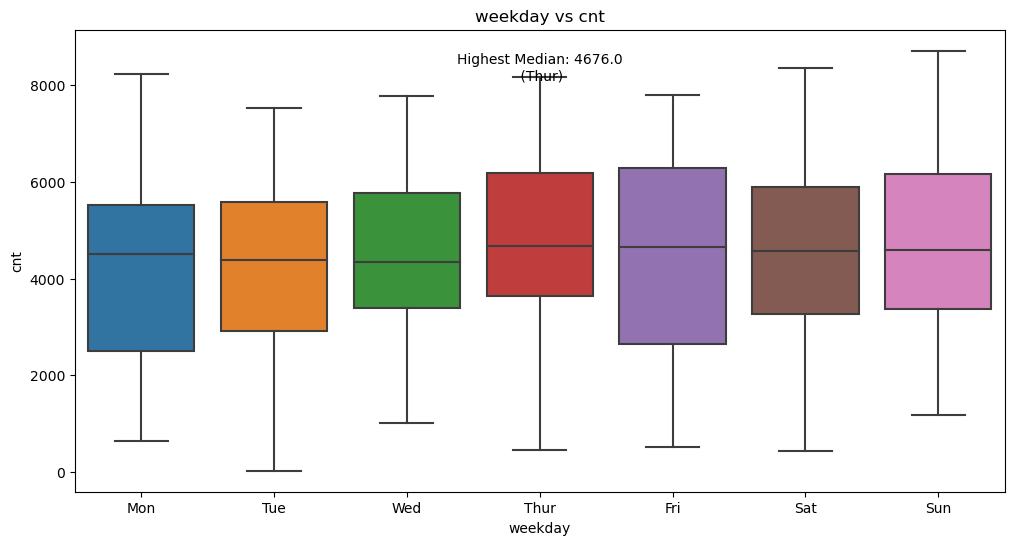

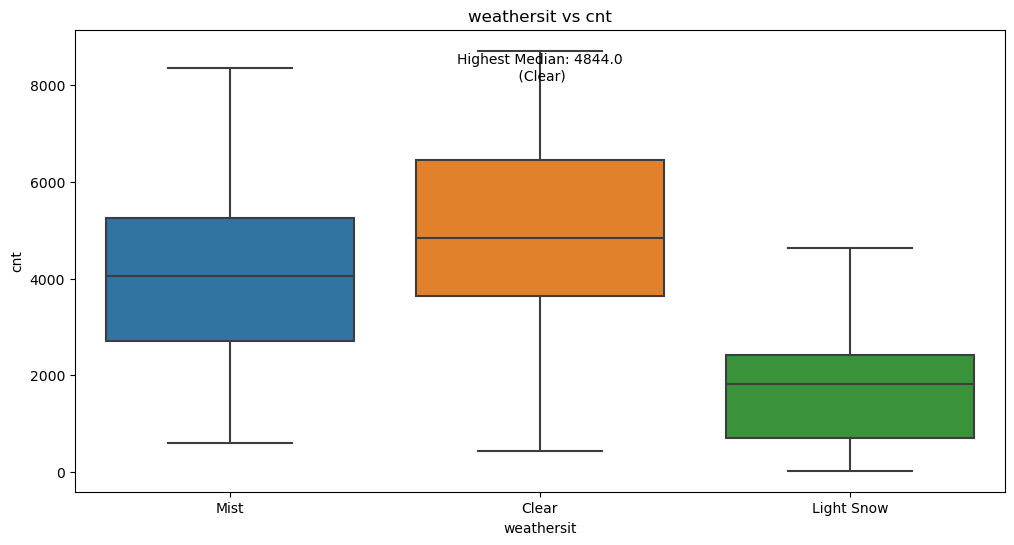

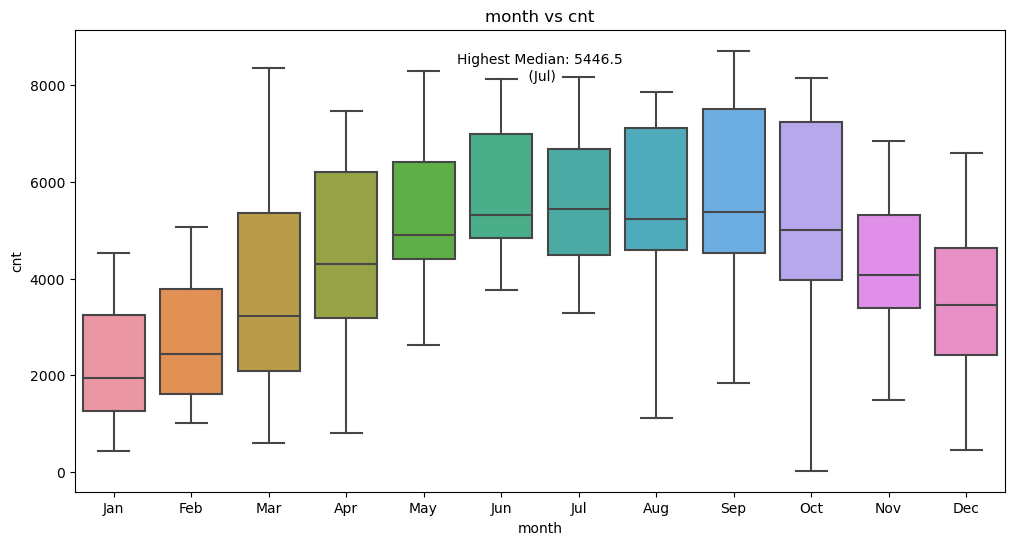

In [23]:
for i in objects:
    plt.figure(figsize=(12,6))
    ax=sns.boxplot(x=i,y="cnt",data=df)
    plt.title(f"{i} vs cnt")
    #finding the highest median value
    hm=df.groupby(i)["cnt"].median().max()
    hc=df.groupby(i)["cnt"].median().idxmax()
    #annotating the highest median category
    ax.annotate(f"Highest Median: {hm}\n ({hc})",xy=(0.5,0.95),xycoords="axes fraction",ha="center",va="top")
    plt.show()

Here, after taking statistical data for the numerical-categorical columns, we can see that, the highest median in the year column is for 2019, in the holiday column the highest mean is given for 0(which is not a holiday), in season the highest median is for FALL, in months the highest median is for JULY, in weekdays the highest median is for THURSDAY, in weatherset the highest median is for CLEAR, in working day column the highest median is for non-working day.

# Multivariate Analysis

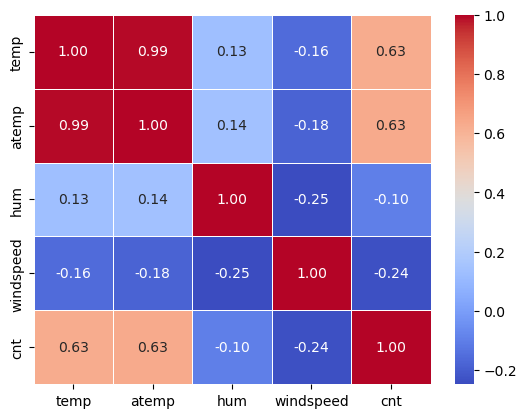

In [24]:
#creating correlation matrix
corr=df[numericals].corr()
sns.heatmap(corr,annot=True, cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.show()

Correlation betweeen temp and atemp is the highest and it is a positive correlation.
The second highest correlation is between temp and count, which is 0.63.
atemp and count is also having positive correlation, which is 0.63.
windspeed is having the highest negative correlation with the count variable, which is -0.24.
humidity is having highest negative correlation with windspeed, which is -0.25.
humidity is having the least negavtive correlation with the count variable, which is -0.1
We know that count is our Y variable and remaining all are X variables, so the highest correlation between the X variables might lead to multi-collinearity or having high VIF value.
We can see that, X-variable temp is highly correlated with count variable(Y variable).
atemp is also having same correlation value as temp vs count, but temp and atemp are highly correlated(atemp is a derived variable from temp), so we oly consider temp variable for further process.

# Data Preparation

In [25]:
#creating dummby variables(encoding of categotical columns)
for i in obj_cols:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df = pd.concat([df, dummy], axis = 1)
    df.drop([i],axis=1,inplace=True)

In [26]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


# Splitting the Data into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[numericals] = scaler.fit_transform(df_train[numericals])

In [31]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


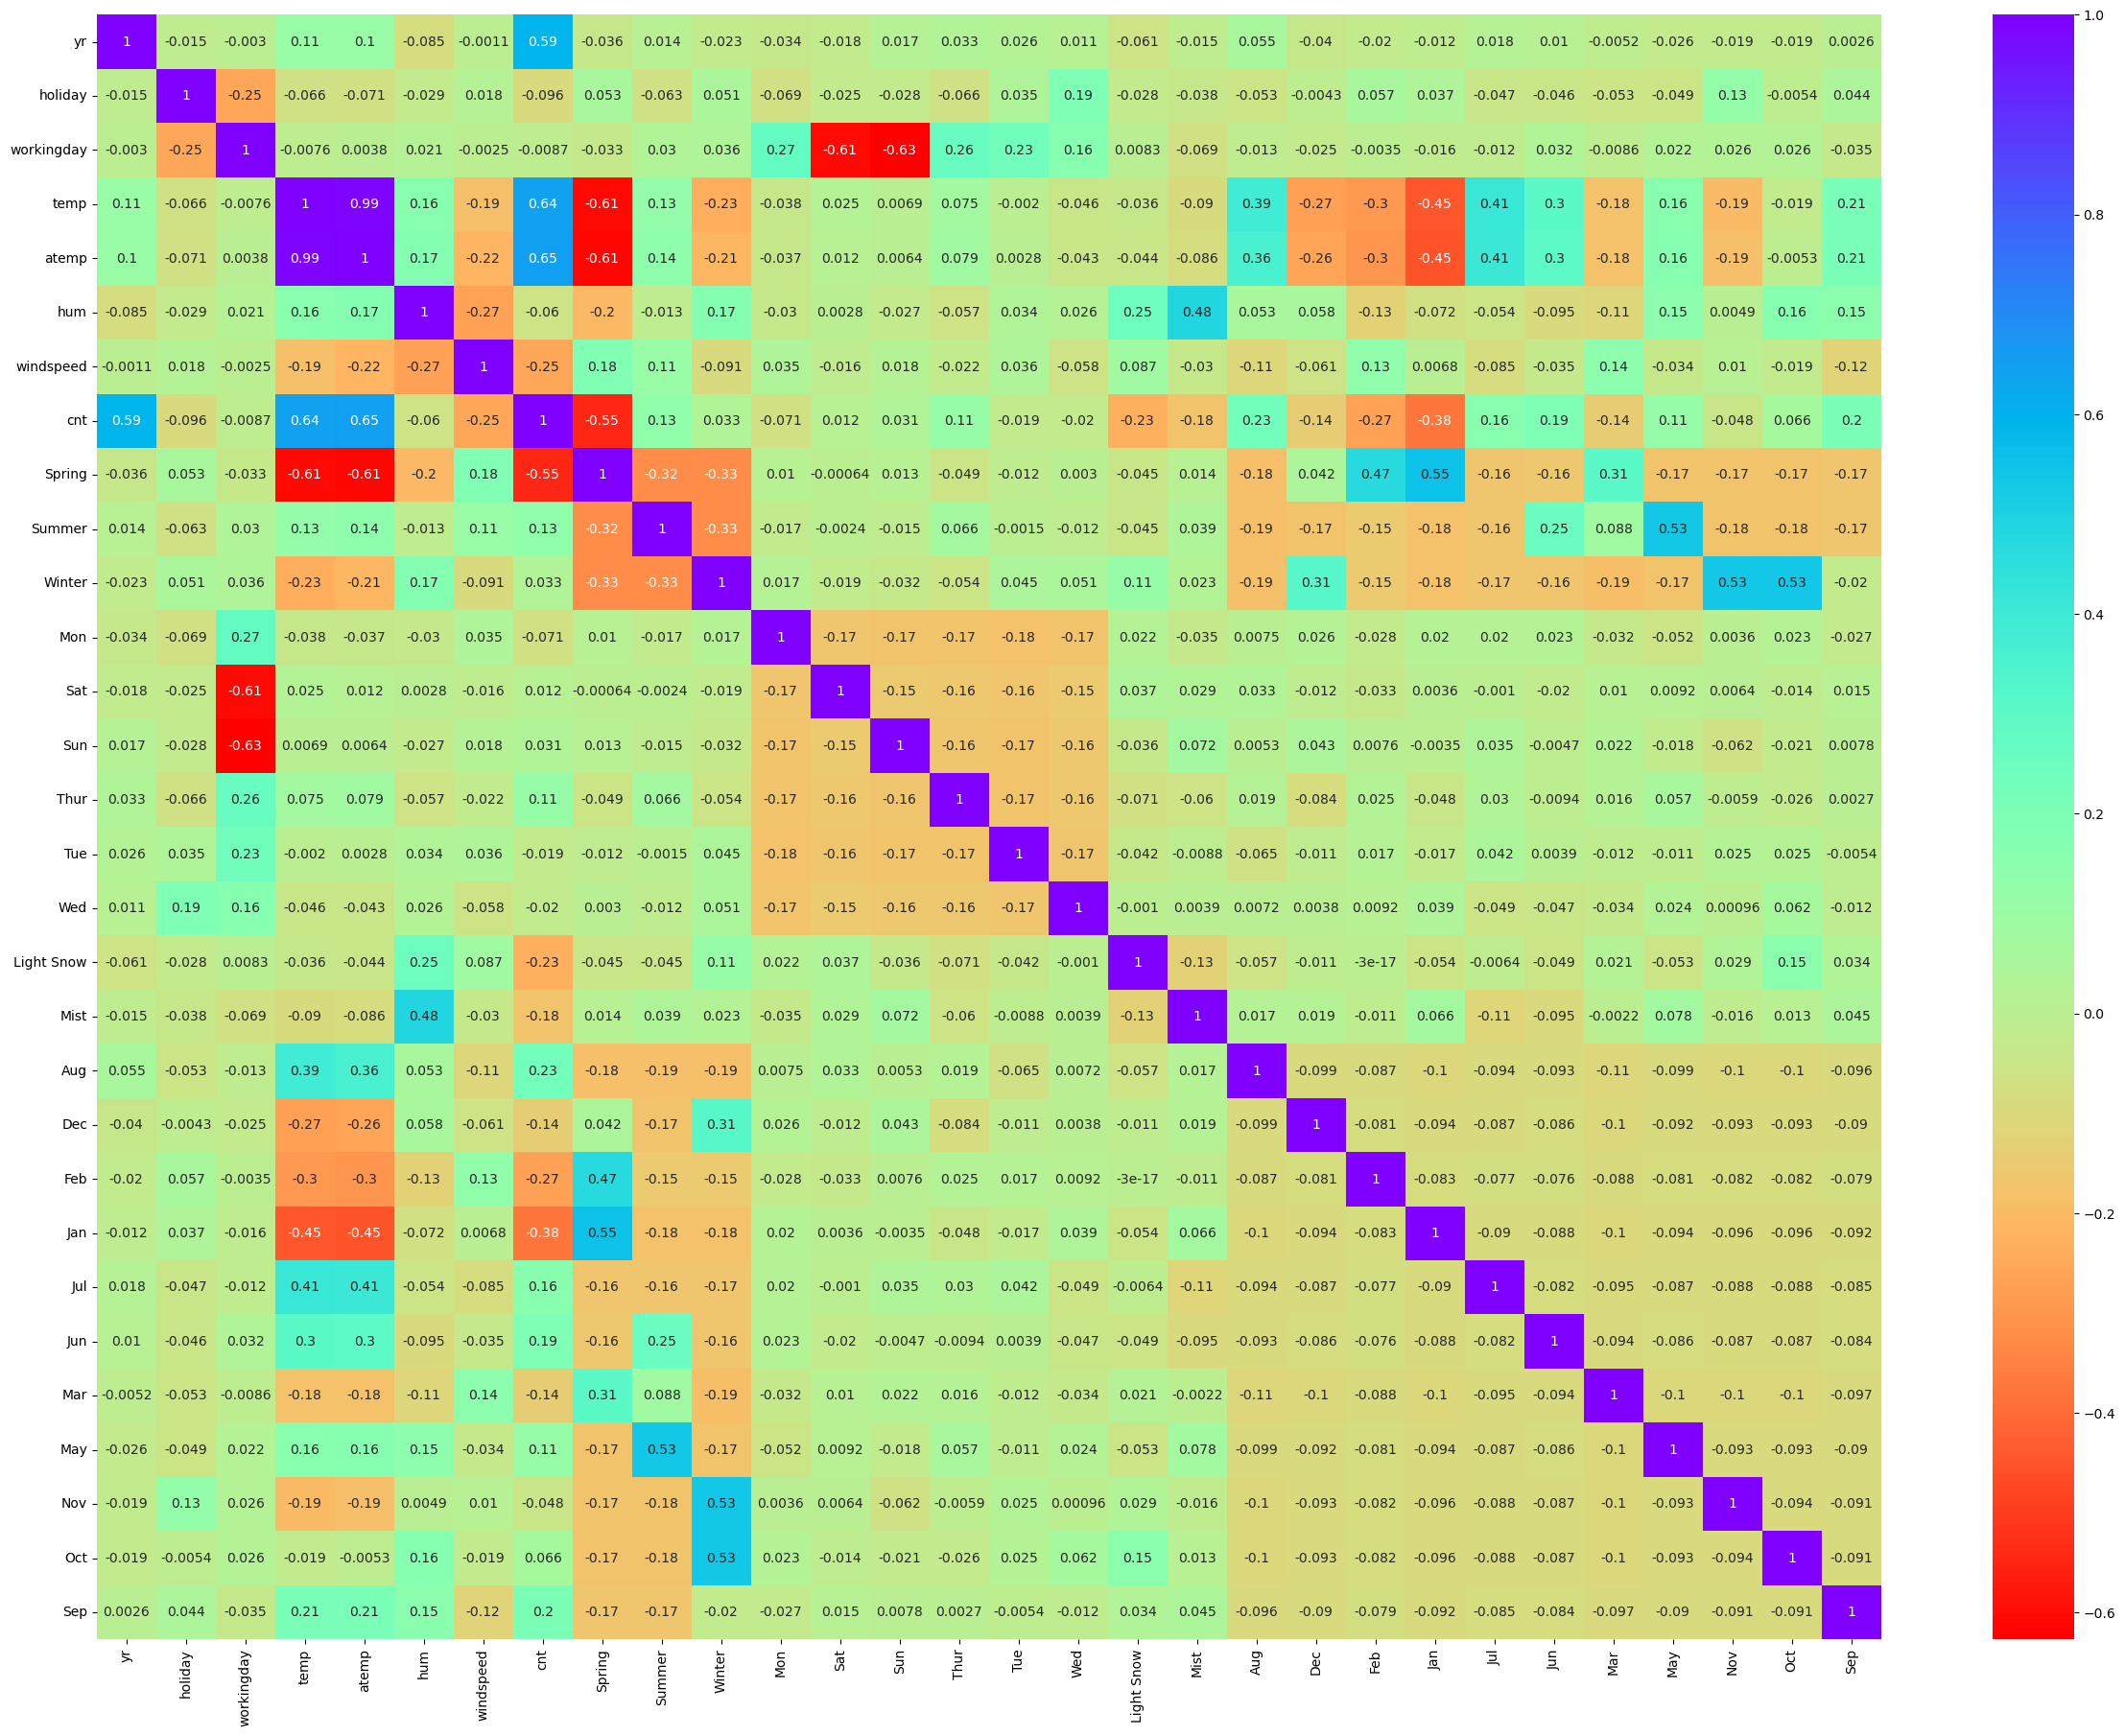

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 22))
sns.heatmap(df_train.corr(), annot = True, cmap="rainbow_r")
plt.show()

Since atemp and temp are highly correlated, they must be having multicollinearity or dependent on each other, so dropping atemp from the consideration and yr is a numerical-categorical column, so there will be no variation found on this x variable, so dropping the yr column from the consideration so that we are left with temp column which is a continuous variable and proceed to plot the best fit line.

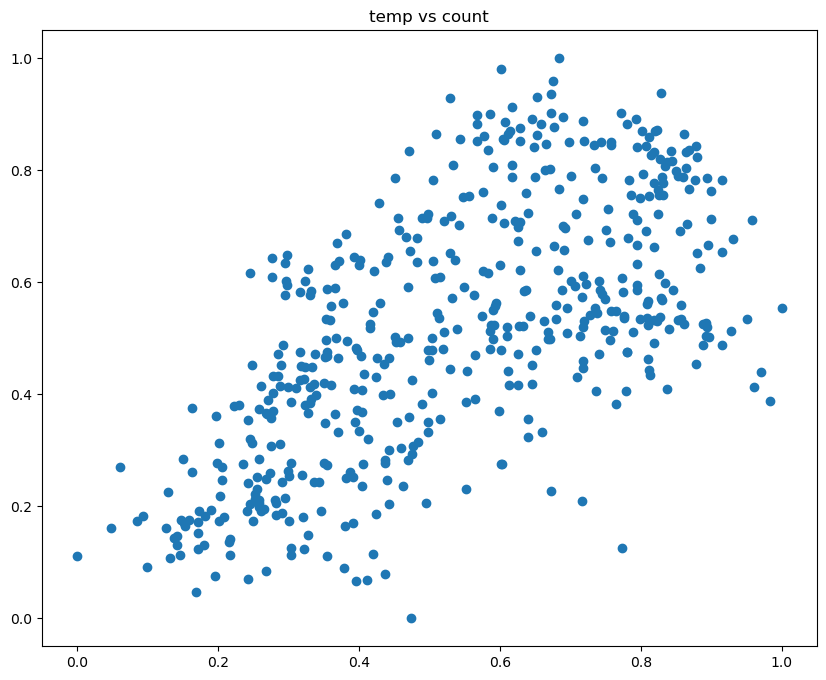

In [34]:
#plotting the scatter plot using the temp and cnt variables derived fromt the heatmap
plt.figure(figsize=[10,8])
plt.scatter(df_train["temp"],df_train["cnt"])
plt.title("temp vs count")
plt.show()

# Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building a linear model

In [36]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
bike_lr = sm.OLS(y_train, X_train_lm).fit()

In [37]:
X_train_lm

,const,temp
653,1.0,0.509887
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
...,...,...
526,1.0,0.824514
578,1.0,0.863973
53,1.0,0.202618
350,1.0,0.248216


In [38]:
# Check the parameters obtained

bike_lr.params

const    0.169798
temp     0.639952
dtype: float64

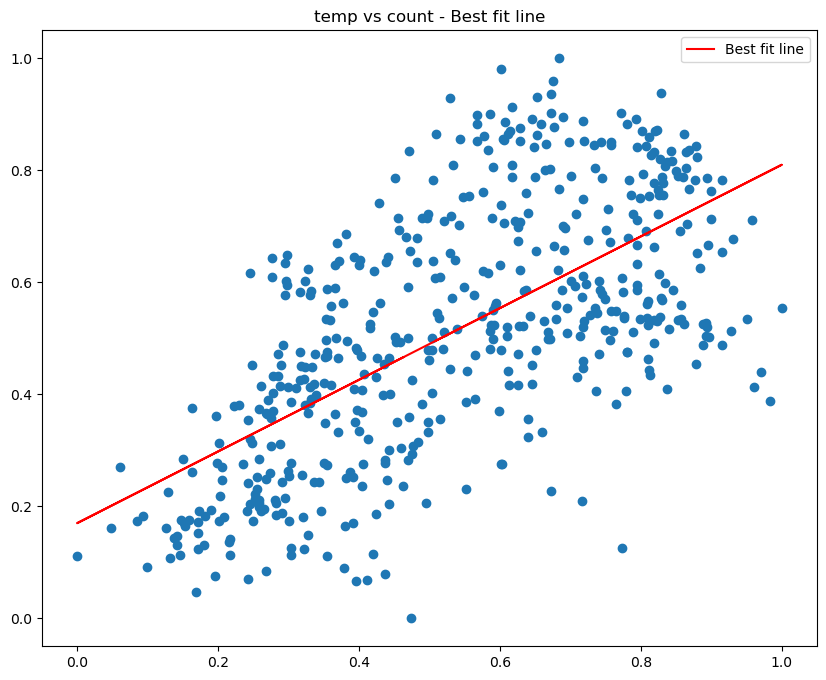

In [39]:
#plotting the best fit line using the temp and cnt variables derived fromt the heatmap
plt.figure(figsize=[10,8])
plt.scatter(X_train_lm["temp"],y_train)
plt.title("temp vs count - Best fit line")
#calculating the best fit line using numpy
x=X_train_lm["temp"]
y=y_train
m,c=np.polyfit(x,y,1)
plt.plot(x,m*x+c,color="red",label="Best fit line")
plt.legend()
plt.show()

So to validate our assumption of taking temp(since it is higly correlated with Y), we actually plotted regression model with these variables(temp and cnt) and we can clearly see that the plot is well diversified with no particular patterns, where best fit line is also possible so, our assumption of temp being the major variable is correct. Now, lets find out the additional best features suitable for the model.

In [40]:
# Print a summary of the linear regression model obtained
print(bike_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           5.80e-61
Time:                        21:32:49   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

We can see that R-squared value for temp is 0.41, i.e., the temp alone is explaining 41.4% of target variable(cnt)

# Adding another variable

We can derive features by different techniques, we are choosing top 15 features by automated Recursive Feature Elimination w.r.t RFE ranking and support.

In [41]:
#finding the variables to add to the regression model train set using RFE method(with the help of support and rank)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
bike_reg = LinearRegression()
#from the heat map, considering top 15 columns which are correlated w.r.t count variables
bike_rfe = RFE(estimator=bike_reg, n_features_to_select=15)
bike_rfe = bike_rfe.fit(X_train, y_train)

In [42]:
bike_features = [(i,j,k) for i,j,k in zip(X_train.columns, bike_rfe.support_, bike_rfe.ranking_) if j]


In [43]:
bike_features

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Dec', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Nov', True, 1),
 ('Sep', True, 1)]

In [44]:
bike_features_cols = [i for i,j,k in zip(X_train.columns, bike_rfe.support_, bike_rfe.ranking_) if j]
bike_features_cols

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'Spring',
 'Summer',
 'Winter',
 'Light Snow',
 'Mist',
 'Dec',
 'Jan',
 'Jul',
 'Nov',
 'Sep']

In [45]:
#Assigning the selected features to a new variable
X_train_rfe_cols=df_train[bike_features_cols]

In [46]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_rfe_cols)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.320243
yr            0.230328
holiday      -0.091228
temp          0.479977
hum          -0.160227
windspeed    -0.188457
Spring       -0.061737
Summer        0.040767
Winter        0.103435
Light Snow   -0.248116
Mist         -0.055876
Dec          -0.037199
Jan          -0.043748
Jul          -0.055495
Nov          -0.040949
Sep           0.074891
dtype: float64

In [47]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.34e-189
Time:                        21:32:50   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_cols.values, i) for i in range(X_train_rfe_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
9,Mist,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


Since humidity is having the highest VIF value, we are dropping it.

In [50]:
X_train_rfe_cols.drop('hum',inplace=True,axis=1)

In [51]:
# Build linear model with the updated columns

X_train_lm = sm.add_constant(X_train_rfe_cols)

lr2 = sm.OLS(y_train, X_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.57e-186
Time:                        21:32:50   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [52]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_cols.values, i) for i in range(X_train_rfe_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,Winter,2.94
4,Spring,2.89
5,Summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.59
8,Mist,1.56


The VIF values of each and every column are around 5 or less(since 5 being the threshold value), so we will stop eliminating features based on VIF scores and start manually performing feature eilimination w.r.t to p-values.

# Manual feature elimination

In [53]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.57e-186
Time:                        21:32:50   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [54]:
#summer column has high p-value compared to others, so dropping it and analysing
X_train_rfe_cols.drop("Summer",inplace=True,axis=1)

In [55]:
# Build linear model with the updated columns

X_train_lm = sm.add_constant(X_train_rfe_cols)
lr3 = sm.OLS(y_train, X_train_lm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.08e-186
Time:                        21:32:50   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.0

In [56]:
# Nov column has the high p-value compared to others, so dropping
X_train_rfe_cols.drop("Nov",inplace=True,axis=1)

In [57]:
# Build linear model with the updated columns

X_train_lm = sm.add_constant(X_train_rfe_cols)

lr4 = sm.OLS(y_train, X_train_lm).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.02e-186
Time:                        21:32:50   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.025     11.074      0.0

In [58]:
#dropping Dec column as per the above p-values
X_train_rfe_cols.drop("Dec",inplace=True,axis=1)

In [59]:
# Build linear model with the updated columns

X_train_lm = sm.add_constant(X_train_rfe_cols)

lr5 = sm.OLS(y_train, X_train_lm).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.13e-186
Time:                        21:32:50   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2657      0.025     10.843      0.0

In [60]:
#dropping Jan column as per the above p-values
X_train_rfe_cols.drop("Jan",inplace=True,axis=1)

In [61]:
# Build linear model with the updated columns

X_train_lm = sm.add_constant(X_train_rfe_cols)

lr6 = sm.OLS(y_train, X_train_lm).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.16e-186
Time:                        21:32:50   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.0

Now we can see that, the p-values are around zero, so these features are significant, and we can stop performing feature elimination and fix to this as finalised model to plot the best fit line.

In [62]:
# Calculate the VIFs again for the finalised model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_cols.values, i) for i in range(X_train_rfe_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,Spring,1.65
7,Mist,1.51
5,Winter,1.40
8,Jul,1.35
9,Sep,1.20
6,Light Snow,1.08
1,holiday,1.04


In [63]:
#finding the coefficients
print(lr6.params)

const         0.251899
yr            0.234092
holiday      -0.098556
temp          0.451455
windspeed    -0.139817
Spring       -0.110795
Winter        0.047278
Light Snow   -0.286408
Mist         -0.081133
Jul          -0.072719
Sep           0.057705
dtype: float64


In [64]:
X_train_rfe_cols

,yr,holiday,temp,windspeed,Spring,Winter,Light Snow,Mist,Jul,Sep
653,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,0,0,1,0,0
578,1,0,0.863973,0.187140,0,0,0,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,1,0,0


Now, the VIF and p-values are in the correct range, so we can start making our predictions using this model

# Validating assumptions

In [65]:
y_train_predict=lr6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

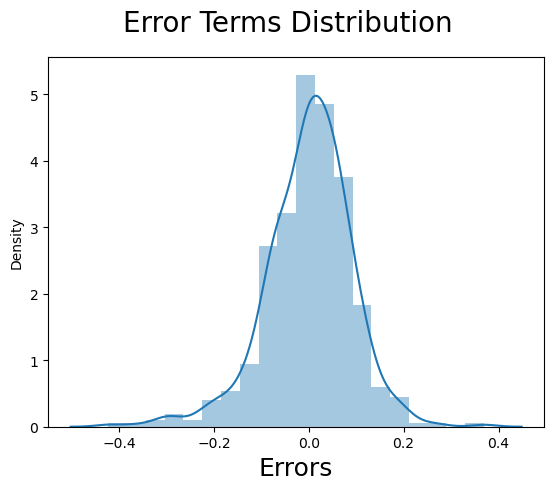

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

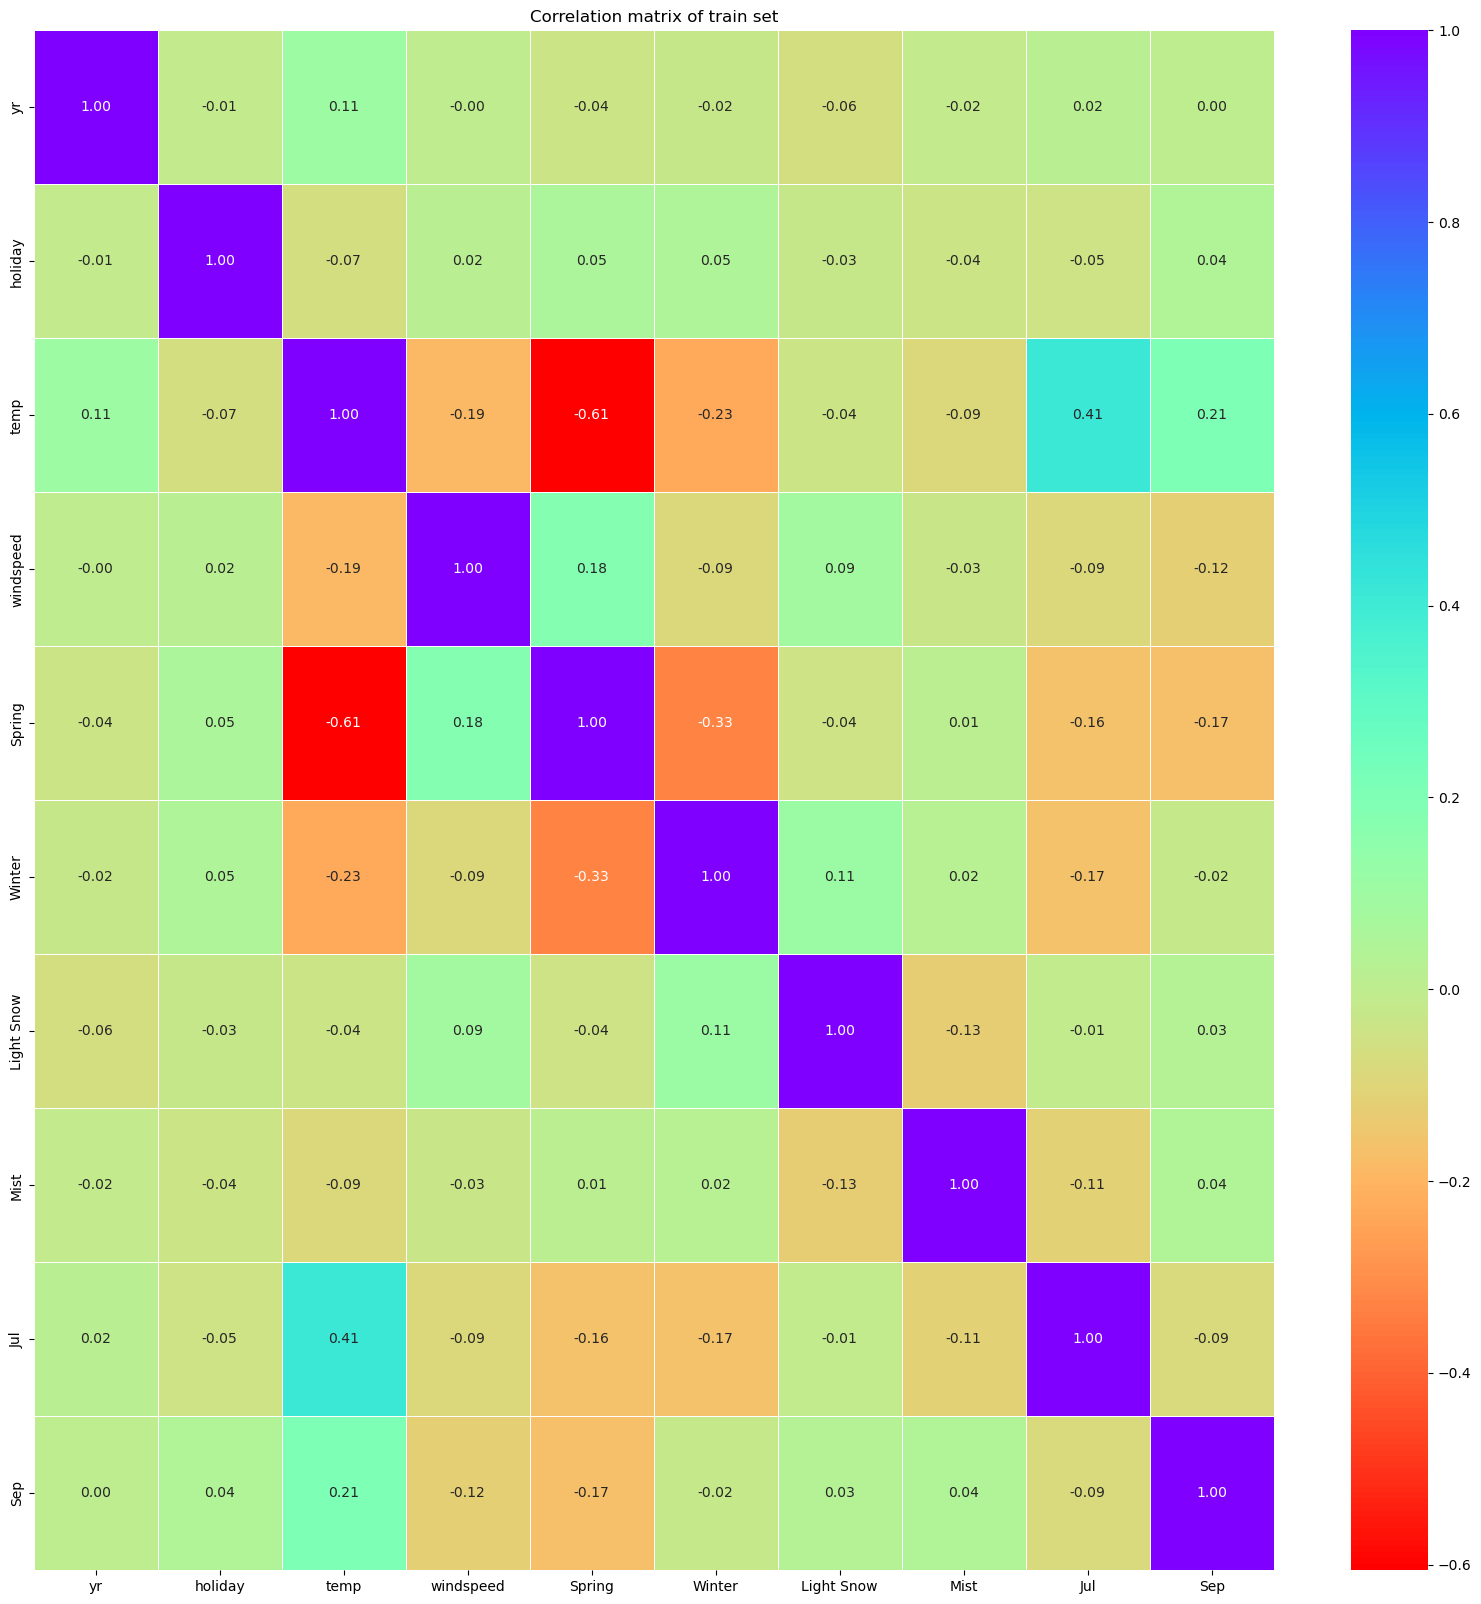

In [67]:
#checking multicollinearity using correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(X_train_rfe_cols.corr(),annot=True,cmap="rainbow_r",fmt=".2f",linewidths=0.5)
plt.title("Correlation matrix of train set")
plt.show()

Here we can see that correlation between variables is not more

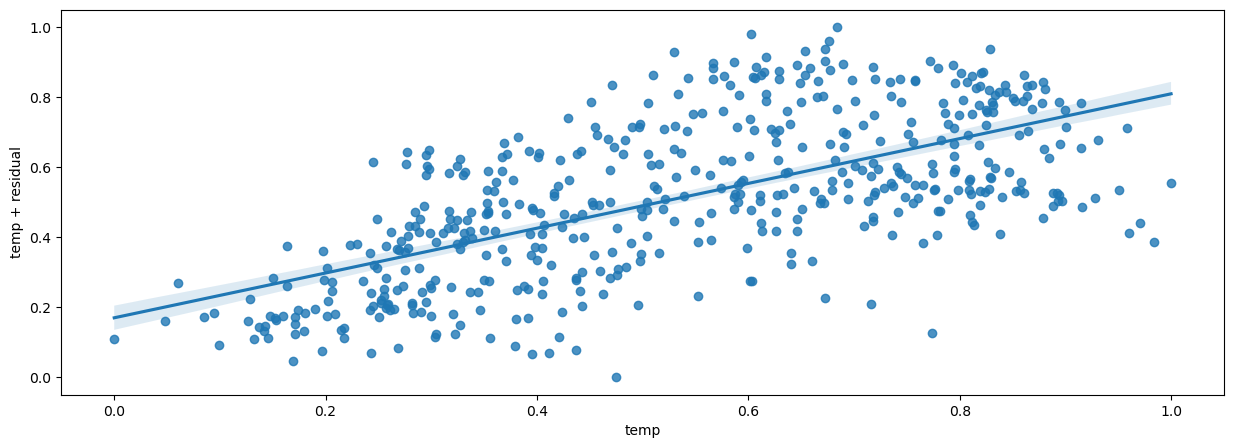

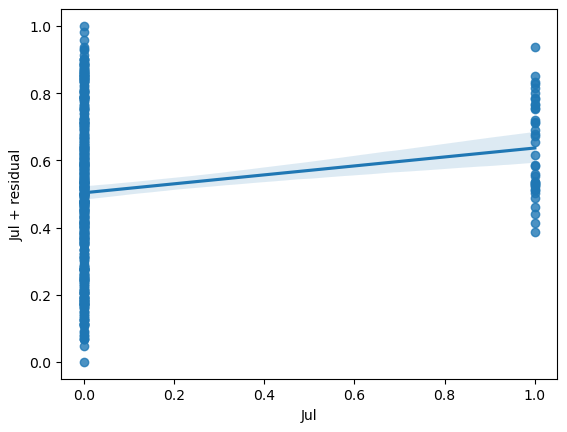

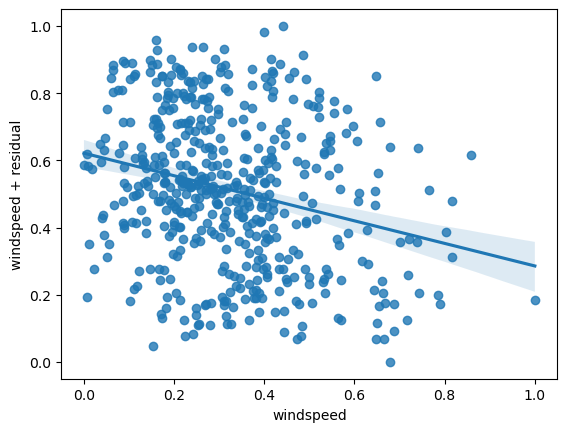

In [68]:
#checking lineriaty
var=["temp","Jul","windspeed"]
plt.figure(figsize=(15,5))
for i in var:
    sns.regplot(x=X_train_lm[i],y=lr6.resid+lr6.predict(sm.add_constant(X_train_lm)))
    plt.xlabel(i)
    plt.ylabel(str(i)+" + residual")
    plt.show()


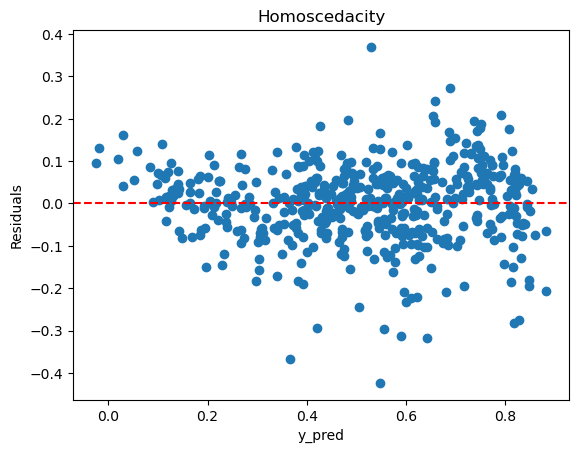

In [69]:
#checking homoscedacity
y_train_predict=lr6.predict(X_train_lm)
residuals=y_train-y_train_predict
#plot scatter plot for residuals vs predicted values
plt.scatter(x=y_train_predict,y=residuals)
plt.axhline(y=0,color="red",linestyle="--")
plt.title("Homoscedacity")
plt.xlabel("y_pred")
plt.ylabel("Residuals")
plt.show()

# Making Predictions Using the Final Model¶

Applying the scaling on the test sets¶

In [70]:
df_test[numericals] = scaler.transform(df_test[numericals])

In [71]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [74]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm, 
# we will achieve the columns which are in the final model of the train set.

X_test_lm = X_test_lm.drop(["workingday","atemp","hum","Summer","Mon","Sat","Sun","Thur","Tue","Wed","Aug","Dec","Feb","Jan","Jun","Mar","May","Nov","Oct"], axis = 1)

In [75]:
X_test_lm.head()

,const,yr,holiday,temp,windspeed,Spring,Winter,Light Snow,Mist,Jul,Sep
184,1.0,0,1,0.831783,0.084219,0,0,0,1,1,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0


In [76]:
# Making predictions using the final model

y_test_pred = lr6.predict(X_test_lm)


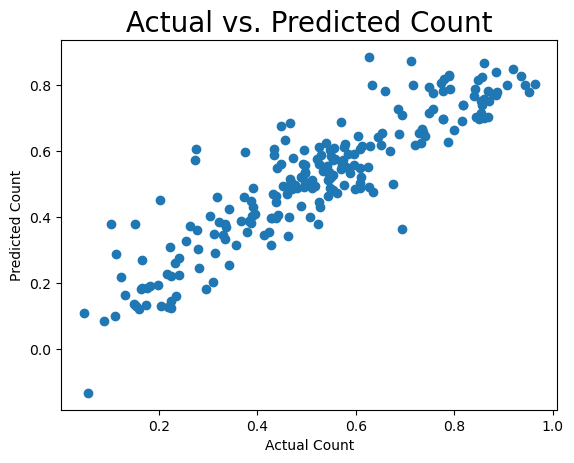

In [77]:
# Plotting actual vs predicted count
fig, ax = plt.subplots()
# Scatter plot of y_test vs y_test_pred
ax.scatter(y_test, y_test_pred)
# Setting the title and labels
ax.set_title('Actual vs. Predicted Count', fontsize=20)
ax.set_xlabel('Actual Count')
ax.set_ylabel('Predicted Count')
plt.show()

This plot can tell us the linearity between the independent variables and dependent variables, reasonably well.
The closer the data points are aligned with the line y=x, more accurate is our prediction. We can see that most of the data points are aligned tightly to the y=x line. So that our model is more accurate.
As the points are closer to y=x line, there is a minimal difference between the data points above and below the line, so this will not come under overfitting or underfitting.
The far away data points from the y=x line, are more likely to be outliers. We can see there are no outliers.

In [78]:
#calculate r-squared score
from sklearn.metrics import r2_score
r2=round(r2_score(y_test,y_test_pred),4)
r2

0.807

In [79]:
round(lr6.params,4)

const         0.2519
yr            0.2341
holiday      -0.0986
temp          0.4515
windspeed    -0.1398
Spring       -0.1108
Winter        0.0473
Light Snow   -0.2864
Mist         -0.0811
Jul          -0.0727
Sep           0.0577
dtype: float64

cnt = 0.2519+0.2341*yr-0.0986*holiday+0.4515*temp-0.1398*windspeed-0.1108*Spring+0.0473*Winter-0.2864*Light Snow-0.0811*Mist-0.0727*Jul+0.0577*Sep

This is our line equation with the significant X-variables

In [80]:
#calculating adjusted R-square
adj_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adj_r2

0.7774

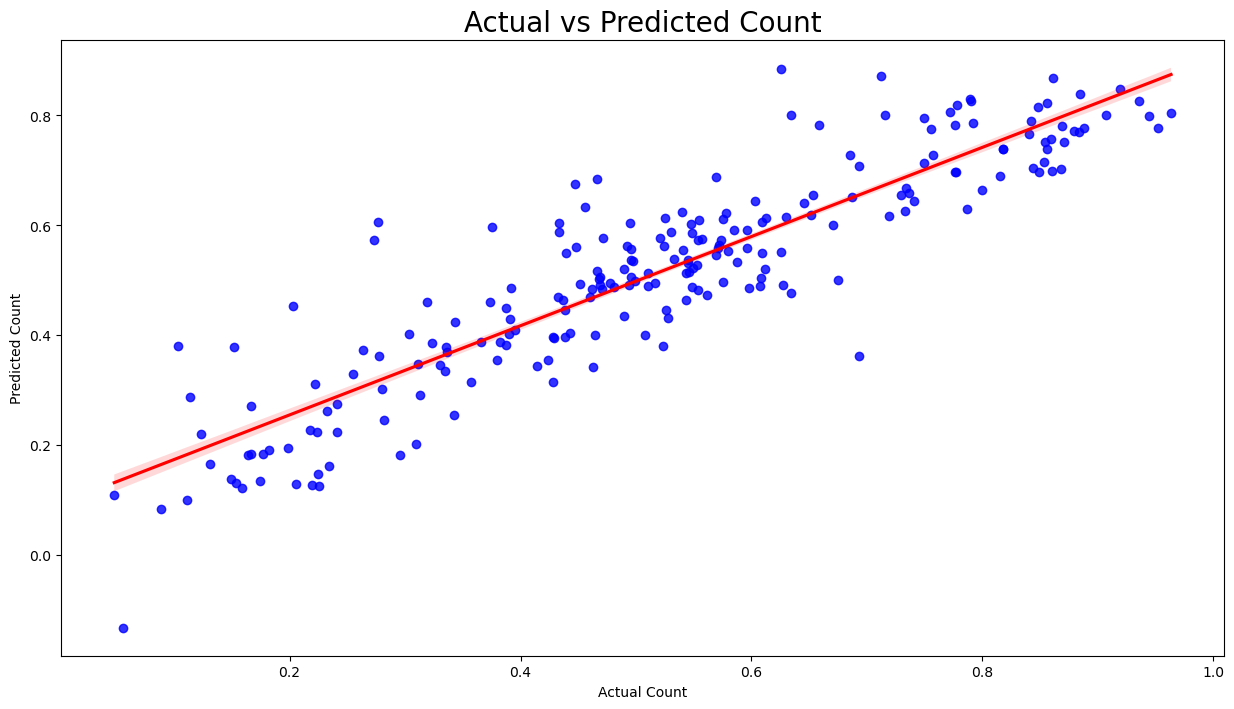

In [81]:
# Visualizing the fit on the test data
plt.figure(figsize=(15,8))
# Plotting a regression plot
sns.regplot(x=y_test, y=y_test_pred, ci=68, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Actual vs Predicted Count', fontsize=20)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.show()

### Model evaluation using R-squared and Adjusted R-squared

#### Comparison between train and test data sets as follows :

#### The R-squared value of train set is 0.833 and test set is 0.807 i.e., approximately 81% of the variability in bike demand is explained by the model 

#### The Adjusted R-squared value of train set is 0.830 and test set is 0.7774 i.e., approximately 78% of the variability in bike demand is explained by the model after penalizing the inappropriate variables.